**Day 1: This notebook makes the global map that shows the locations of IP addresses after filtering out instances where the caller was CloudPBX.**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import geoip2.database
from mpl_toolkits.basemap import Basemap, cm

In [2]:
DATA_ROOT = '../data'
CSV_FILE_PATH = os.path.join(DATA_ROOT,'127.0.0.1-2018-05-2018-3-58 PM- voipmonitor-cdr.csv')
GEOLITE_DB_PATH = os.path.join(DATA_ROOT,'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(GEOLITE_DB_PATH)

DESCRIBED_COLUMNS = ["calldate", "callend", "duration", "connect_duration", "progress_time", 
                     "first_rtp_time", "caller", "caller_domain", "caller_reverse", "callername", 
                     "callername_reverse", "called", "called_domain", "called_reverse", "sipcallerip", 
                     "sipcallerport", "sipcalledip", "sipcalledport", "whohanged", "lastSIPresponse_id", 
                     "dscp", "a_payload", "b_payload", "a_saddr", "b_saddr", "a_received", "b_received", 
                     "a_lost", "b_lost", "a_ua_id", "b_ua_id", "a_avgjitter_mult10", "b_avgjitter_mult10",
                     "a_maxjitter", "b_maxjitter", "a_sl1", "a_sl2", "a_sl3", "a_sl4", "a_sl5", "a_sl6", 
                     "a_sl7", "a_sl8", "a_sl9", "a_sl10", "a_d50", "a_d70", "a_d90", "a_d120", "a_d150", 
                     "a_d200", "a_d300", "b_sl1", "b_sl2", "b_sl3", "b_sl4", "b_sl5", "b_sl6", "b_sl7", 
                     "b_sl8", "b_sl9", "b_sl10", "b_d50", "b_d70", "b_d90", "b_d120", "b_d150", "b_d200", 
                     "b_d300", "a_mos_f1_mult10", "a_mos_f2_mult10", "a_mos_adapt_mult10", 
                     "b_mos_f1_mult10", "b_mos_f2_mult10", "b_mos_adapt_mult10", "a_rtcp_loss", 
                     "a_rtcp_maxfr", "a_rtcp_avgfr_mult10", "a_rtcp_maxjitter", "a_rtcp_avgjitter_mult10", 
                     "b_rtcp_loss", "b_rtcp_maxfr", "b_rtcp_avgfr_mult10", "b_rtcp_maxjitter", 
                     "b_rtcp_avgjitter_mult10", "packet_loss_perc_mult1000", "a_packet_loss_perc_mult1000", 
                     "b_packet_loss_perc_mult1000", "delay_sum", "a_delay_sum", "b_delay_sum", 
                     "a_rtp_ptime", "b_rtp_ptime"]

In [3]:
locn = pd.read_csv('../data/locn-filtered.csv')
sipcallerasorg = locn['sipcallerasorg']

locn_new = locn[sipcallerasorg!='CloudPBX']

#connect_duration = locn_fsip['connect_duration'] 

#locn_fdur = locn_fsip[connect_duration>0]
locn.head()

,Unnamed: 0,ID,calldate,callend,duration,connect_duration,progress_time,first_rtp_time,caller,caller_domain,...,ipaddr_lons_ip_caller,ipaddr_lons_ip_called,sipcallerasn,sipcallerasorg,sipcalledasn,sipcalledasorg,a_saddr_asn,a_saddr_asorg,b_saddr_asn,b_saddr_asorg
0,0,76108556,2018-05-01 12:19:22,2018-05-01 12:20:15,53,29.0,3.0,3.0,user_z,sanitized,...,-79.7202,-79.3716,36493,FIBERNETICS CORPORATION,393755,CloudPBX,36493,FIBERNETICS CORPORATION,393755,CloudPBX
1,1,76108561,2018-05-01 12:19:22,2018-05-01 12:20:15,53,29.0,3.0,3.0,user_z,sanitized,...,-79.7202,-79.3716,36493,FIBERNETICS CORPORATION,393755,CloudPBX,36493,FIBERNETICS CORPORATION,393755,CloudPBX
2,2,76104730,2018-05-01 11:12:41,2018-05-01 11:13:34,53,37.0,3.0,3.0,user_z,sanitized,...,-79.3860,-79.3716,22652,Fibrenoire Inc.,393755,CloudPBX,22652,Fibrenoire Inc.,393755,CloudPBX
3,3,76104735,2018-05-01 11:12:41,2018-05-01 11:13:34,53,37.0,3.0,3.0,user_z,sanitized,...,-79.3860,-79.3716,22652,Fibrenoire Inc.,393755,CloudPBX,22652,Fibrenoire Inc.,393755,CloudPBX
4,4,76105558,2018-05-01 11:40:31,2018-05-01 11:41:51,80,72.0,3.0,3.0,user_z,sanitized,...,-79.7202,-79.3716,36493,FIBERNETICS CORPORATION,393755,CloudPBX,36493,FIBERNETICS CORPORATION,393755,CloudPBX


In [4]:
lons_caller = locn_new['ipaddr_lons_ip_caller']
lat_caller = locn_new['ipaddr_lat_sip_caller']
lons_called = locn_new['ipaddr_lons_ip_called']
lat_called = locn_new['ipaddr_lat_ip_called']

len(lons_called)

3082

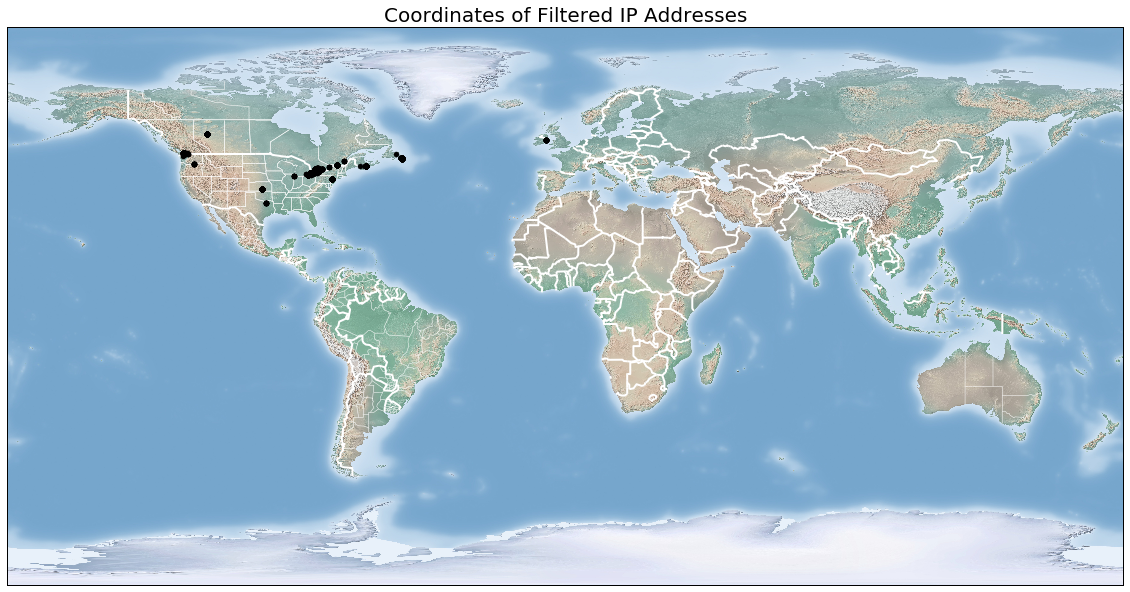

In [5]:
fig = plt.figure(figsize=(20, 16), edgecolor='w')
m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

m.drawcountries(linewidth=2, linestyle='solid', color='w' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='w')
m.shadedrelief()

x1, y1 = lons_caller, lat_caller
m.plot(x1, y1, 'ko', markersize=5, label='caller')

x2, y2 = lons_called, lat_called
m.plot(x2, y2, 'ko', markersize=5, label='receiver')

plt.title('Coordinates of Filtered IP Addresses', fontsize=20)
fig.savefig('map_full.png', dpi=100, bbox_inches='tight')